In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
train_data =pd.read_csv('/content/train (1).csv')
test_data= pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
for column in train_data.columns:
  if train_data[column].dtype == 'object':
    #fill missing values with the mode for categorial features
    train_data[column].fillna(train_data[column].mode()[0],inplace=True)
    if column in test_data.columns:
      test_data[column].fillna(test_data[column].mode()[0],inplace=True)

    else:
        # fill missing values with mean for numeric features
         train_data[column].fillna(train_data[column].mean(), inplace=True)
         if column in test_data.columns:
          test_data[column].fillna(test_data[column].mean(), inplace=True)


In [ ]:
#select features
feautres = ['GrLivArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']
X=train_data[feautres]
y=train_data['SalePrice']

In [ ]:
#split the training data for validation
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred= model.predict(X_val)
mae = mean_absolute_error(y_val,y_pred)
mse= mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val,y_pred)

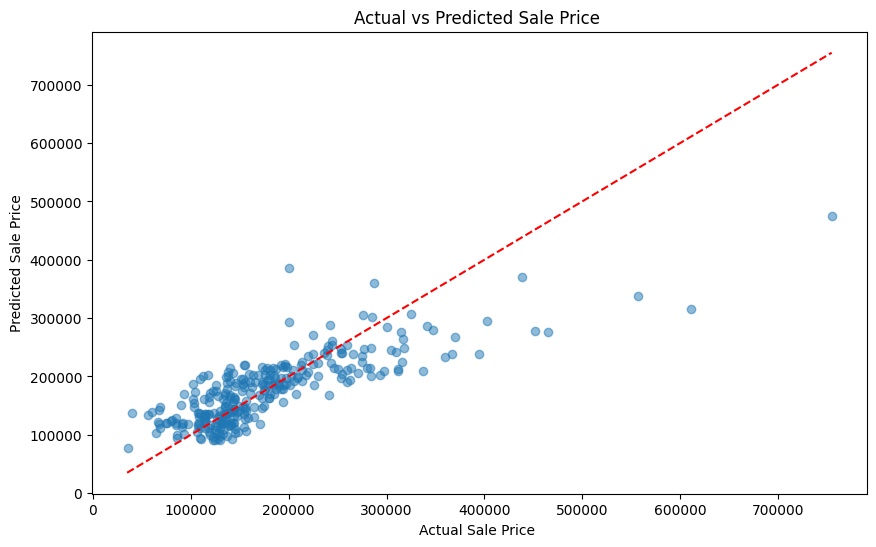

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_val,y_pred,alpha=0.5)
plt.xlabel('Actual Sale Price ')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price ')
plt.plot([y.min(),y.max()],[y.min(),y.max()], 'r--')
plt.show()

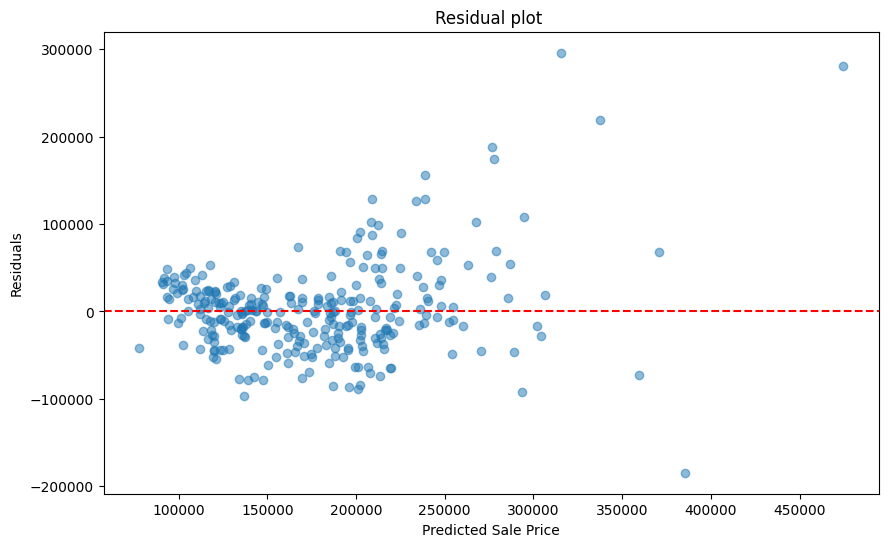

In [ ]:
residuals=y_val - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals ,alpha=0.5)
plt.ylabel('Residuals')
plt.xlabel('Predicted Sale Price')
plt.title('Residual plot ')
plt.axhline(y=0,color='r',linestyle='--')
plt.show()


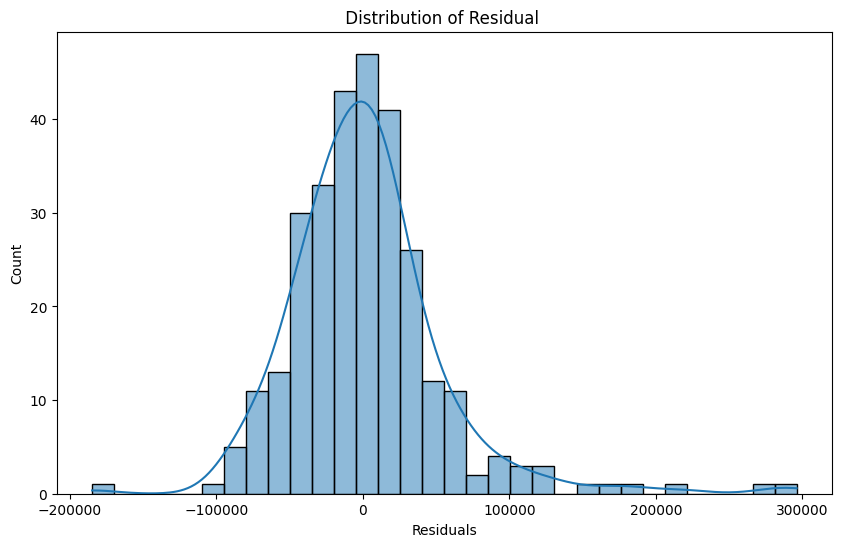

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(residuals ,kde=True)
plt.xlabel('Residuals')
plt.title(' Distribution of Residual  ')
plt.show()